In [1]:
import pandas as pd
import pandas_datareader as pdr

In [13]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (15,12)

In [33]:
df = pdr.DataReader('GOOG', 'yahoo', start='2019-09-10', end='2021-08-17')

In [34]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-08-11,2776.955078,2747.000000,2765.659912,2753.790039,760200,2753.790039
2021-08-12,2768.360107,2735.580078,2754.260010,2767.790039,732300,2767.790039
2021-08-13,2773.479980,2760.100098,2767.149902,2768.120117,628600,2768.120117
2021-08-16,2779.810059,2723.314941,2760.000000,2778.320068,902000,2778.320068
2021-08-17,2774.370117,2736.419922,2763.820068,2746.010010,1063701,2746.010010


<AxesSubplot:xlabel='Date'>

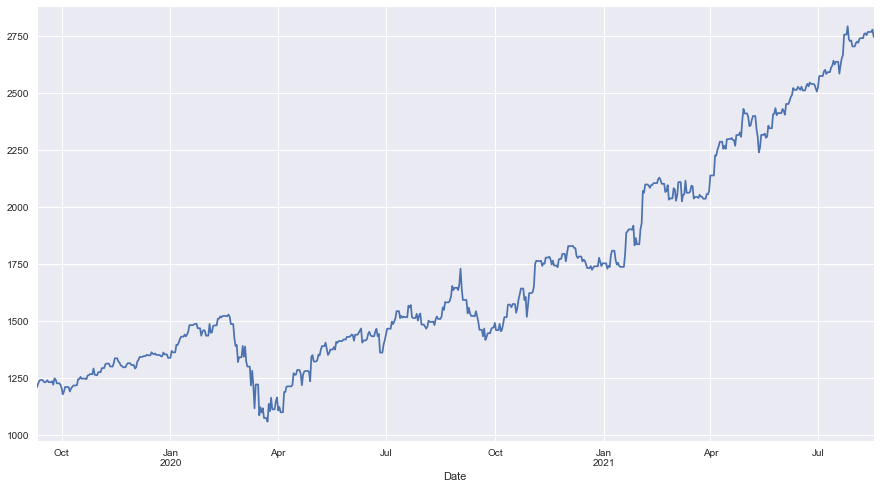

In [63]:
df['Adj Close'].plot(figsize=(15,8))

In [115]:
HOUUS = pdr.DataReader('ticker=HOUUS','econdb')

In [119]:
pdf_vals = pd.DataFrame(HOUUS['traditional','purchase-only','sa'].values)
pdf_Date = pd.DataFrame(HOUUS['traditional','purchase-only','sa'].index)

pdf_House = pd.concat([pdf_Date,pdf_vals],axis=1)
pdf_House.columns = ['Date','US_House_Index']

pdf_House.index = pdf_House['Date']
pdf_House.drop(columns='Date',inplace=True)

In [120]:
pdf_House.head()

,US_House_Index
Date,
2016-09-01,232.8
2016-10-01,233.9
2016-11-01,235.1
2016-12-01,236.5
2017-01-01,236.4


In [121]:
pdf_House = pdf_House.resample('m').ffill()

In [122]:
from statsmodels.tsa.seasonal import seasonal_decompose

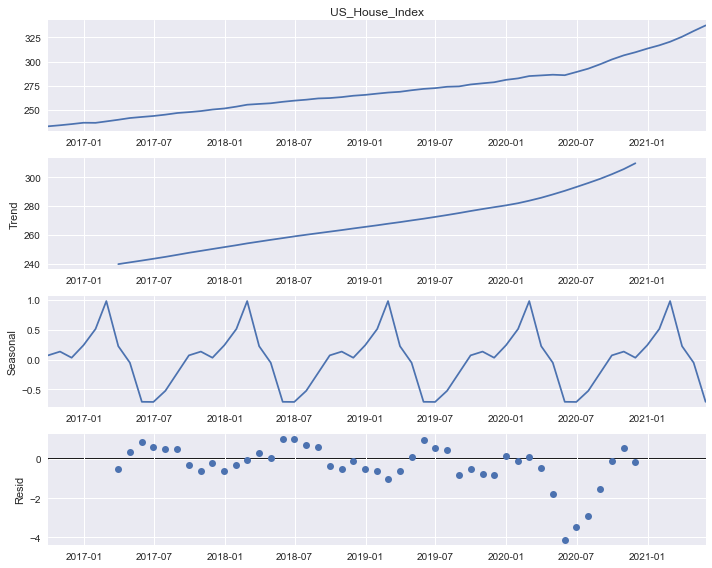

In [123]:
res = seasonal_decompose(pdf_House['US_House_Index'], model='additive')
plt.rcParams['figure.figsize'] = (10, 8)
x = res.plot()